Code for Pharmacological treatments characterization
@uthor: Raju Tomer

In [2]:
import monnet_utils as tl

In [4]:
#Import statements
import skimage.external.tifffile as tff
import os
import numpy as np
from scipy import ndimage as ndi
import scipy as spy
import skimage as sk
import skimage.filters as skf
import skimage.morphology as skm
import skimage.measure as skmes
import matplotlib.patches as mptch
import scipy.io as sio
import scipy as scpy
import glob
import networkx as nx
import time
import matplotlib.pyplot as plt
import pickle
import scipy.signal as spy_sig
import collections
import math
import re
import scipy.spatial.distance
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import kde
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
#from matplotlib import cm
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import community
import pyintergraph
# from cdlib import algorithms

import multiprocessing as mp
from scipy import stats

In [5]:
# from cdlib import algorithms

In [6]:
############## Define function for loading all the pharmacological datasets #################
def read_init_dat():
    d_ad = {}
    d_labIm = {}
    d_fn1 = {}
    d_fn2 = {}
    d_nspIDs = {}
    d_com = {}
    d_dff1 = {}
    d_dff2 = {}

    to_load = ['g', 'f', 'w','t','z','x','l','m','n','o','p','q','a','b','c','d','e']
    
    d01 = 'Y'
    d01_02 = 'Z'
    d02 = 'X'
    d02_02 = 'W'
    
    for batch_id in to_load:
        if (batch_id == 'g'):
            print(batch_id)
            analysis_dir = d02_02 + r':\People\Raju\PicroDose_21_12_24\Sources_LSTM'
            f_data_dir = d02_02 + r':\People\Raju\PicroDose_21_12_24'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'f'):
            print(batch_id)
            analysis_dir = d02_02 + r':\People\Raju\PicroDose_21_12_22\Sources_LSTM'
            f_data_dir = d02_02 + r':\People\Raju\PicroDose_21_12_22'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'w'):
            print(batch_id)
            analysis_dir = d02_02 + r':\People\Raju\PicroDose_21_12_17\Sources_LSTM'
            f_data_dir = d02_02 + r':\People\Raju\PicroDose_21_12_17'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 't'):
            print(batch_id)
            analysis_dir = d02_02 + r':\People\Raju\PicroDose_21_11_12\Sources'
            f_data_dir = d02_02 + r':\People\Raju\PicroDose_21_11_12'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'z'):
            print(batch_id)
            analysis_dir = d02_02 + r':\People\Raju\PicroDose_21_11_07\4xRed\Sources_LSTM'
            f_data_dir = d02_02 + r':\People\Raju\PicroDose_21_11_07\4xRed'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'x'):
            print(batch_id)
            analysis_dir = d01_02 + r':\People\Raju\DAPV_p2\Sources_GPU'
            f_data_dir = d01_02 + r':\People\Raju\DAPV_p2'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'l'):
            print(batch_id)
            analysis_dir = d01_02 + r':\People\Raju\NifeRound\Sources_GPU'
            f_data_dir = d01_02 + r':\People\Raju\NifeRound'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'm'):
            print(batch_id)
            analysis_dir = d01_02 + r':\People\Raju\Ttx_2\Sources_GPU'
            f_data_dir = d01_02 + r':\People\Raju\Ttx_2'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'n'):
            analysis_dir = d01_02 + r':\People\Raju\p1C\Sources_GPU'
            f_data_dir = d01_02 + r':\People\Raju\p1C'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')    
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'o'):
            analysis_dir = d02 + r':\People\Raju\picro\p1B\Sources_LSTM'
            f_data_dir = d02 + r':\People\Raju\picro\p1B'
            print('Batch ', batch_id, ' selected')
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_BT.pickle')
        elif (batch_id == 'p'):
            analysis_dir = d02 + r':\People\Raju\picro\p1\Red4x\sources_LSTM'
            f_data_dir = d02 + r':\People\Raju\picro\p1\Red4x'
            print('Batch ', batch_id, ' selected')
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_p1_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_p1_BT.pickle')
        elif (batch_id == 'q'):
            analysis_dir = d02 + r':\People\Raju\picro\p2\Red4x\Sources_LSTM'
            f_data_dir = d02 + r':\People\Raju\picro\p2\Red4x'
            print('Batch ', batch_id, ' selected')
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_p2_BT.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_p2_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_p2_BT.pickle')
        elif (batch_id == 'a'):
            analysis_dir = d01_02 + r':\People\Raju\Batch07a\LSTM'
            f_data_dir = d01 + r':\Batch 07a\Movies for analysis'
            print('Batch a selected')
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07a-DrugScr-2019-07-SM.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07a-DrugScr-2019-07-SM_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_B07a-DrugScr-2019-07-SM.pickle')
        elif (batch_id == 'b'):
            print('Batch b selected')
            analysis_dir = d01_02 + r':\People\Raju\Batch07b\COLM'
            f_data_dir = d01 + r':\Batch 07b\Movies for analysis'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07b-DrugScr-2019-07-SM.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07b-DrugScr-2019-07-SM_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_B07b-DrugScr-2019-07-SM.pickle')

        elif (batch_id == 'c'):
            print('Batch c selected')
            analysis_dir = d01_02 + r':\People\Raju\Batch07c\LSTM'
            f_data_dir = d01 + r':\Batch 07c\Movies for analysis'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07c-DrugScr-2019-07-SM.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07c-DrugScr-2019-07-SM_AT_corr.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_B07c-DrugScr-2019-07-SM.pickle')

        elif (batch_id == 'd'):
            print('Batch d selected')
            analysis_dir = d01_02 + r':\People\Raju\Batch07d\LSTM'
            f_data_dir = d01 + r':\Batch 07d\Movies for analysis'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07d-DrugScr-2019-07-SM.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07d-DrugScr-2019-07-SM_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_B07d-DrugScr-2019-07-SM.pickle')

        elif (batch_id == 'e'):
            print('Batch e selected')
            analysis_dir = d01_02 + r':\People\Raju\Batch07e\LSTM'
            f_data_dir = d01 + r':\Batch 07e\Movies for analysis'
            dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07e-DrugScr-2019-07-SM.pickle')
            dict_in_fn2 = tl.load_pickle(f_data_dir, r'dict_in_fn_B07e-DrugScr-2019-07-SM_AT.pickle')
            dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab_B07e-DrugScr-2019-07-SM.pickle')

        file_names_nsp_ids = sorted(glob.glob(os.path.join(analysis_dir, 'nsp_ids_key*')))
        dict_nsp_ids_fn = tl.construct_fn_dict(file_names_nsp_ids, key_extr_pat=r'.*nsp_ids_key(\d*)_(.*\.tif)\..*')

        file_names_cords_A = sorted(glob.glob(os.path.join(analysis_dir, 'cords_A_key*')))
        dict_cords_fn = tl.construct_fn_dict(file_names_cords_A, key_extr_pat=r'.*cords_A_key(\d*).*')

        if(1):
            dict_dff1 = tl.load_pickle(analysis_dir, 'dict_dff1_m5.pickle')
            dict_dff2 = tl.load_pickle(analysis_dir, 'dict_dff2_m5.pickle')
        else:
            dict_dff1 = tl.load_pickle(analysis_dir, 'dict_dff1.pickle')
            dict_dff2 = tl.load_pickle(analysis_dir, 'dict_dff2.pickle')

        
        dict_nsp_labs = {}
        dict_com_neuron = {}
        for k,f in dict_nsp_ids_fn.items():
            dict_nsp_labs[k] = np.load(os.path.join(analysis_dir,f))
        for k,f in dict_cords_fn.items():
            dict_com_neuron[k] = np.load(os.path.join(analysis_dir,f))
        d_ad[batch_id] = analysis_dir
        d_labIm[batch_id] = dict_im_lab
        d_fn1[batch_id] = dict_in_fn1
        d_fn2[batch_id] = dict_in_fn2
        d_nspIDs[batch_id] = dict_nsp_labs
        d_com[batch_id] = dict_com_neuron
        d_dff1[batch_id] = dict_dff1
        d_dff2[batch_id] = dict_dff2

    d_dff1_s_p2_filt = {}
    d_dff2_s_p2_filt = {}
    d_dff1_c_p2_filt = {}
    d_dff2_c_p2_filt = {}
    d_dff1_s_zsc_p2_filt = {}
    d_dff2_s_zsc_p2_filt = {}

    for key in to_load:
        if(0): #For median filter 15
            d_dff1_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_s_p2_filt.pickle')
            d_dff2_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_s_p2_filt.pickle')
            d_dff1_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_c_p2_filt.pickle')
            d_dff2_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_c_p2_filt.pickle')
            d_dff1_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_s_zsc_p2_filt.pickle')
            d_dff2_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_s_zsc_p2_filt.pickle')
        if(0): #for median filter 5
            d_dff1_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_s_p2_m5_filt.pickle')
            d_dff2_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_s_p2_m5_filt.pickle')
            d_dff1_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_c_p2_m5_filt.pickle')
            d_dff2_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_c_p2_m5_filt.pickle')
            d_dff1_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_s_zsc_p2_m5_filt.pickle')
            d_dff2_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_s_zsc_p2_m5_filt.pickle')
        if(1): #for median filter 5 with combo
            d_dff1_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_s_p2_m5_filt_combo.pickle')
            d_dff2_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_s_p2_m5_filt_combo.pickle')
            d_dff1_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_c_p2_m5_filt_combo.pickle')
            d_dff2_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_c_p2_m5_filt_combo.pickle')
            d_dff1_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff1_s_zsc_p2_m5_filt_combo.pickle')
            d_dff2_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'dict_dff2_s_zsc_p2_m5_filt_combo.pickle')
    print('Reading data')
        
    return d_ad, d_labIm, d_fn1, d_fn2, d_nspIDs, d_com, d_dff1, d_dff2, d_dff1_s_p2_filt, d_dff2_s_p2_filt, d_dff1_c_p2_filt, d_dff2_c_p2_filt, d_dff1_s_zsc_p2_filt, d_dff2_s_zsc_p2_filt


In [ ]:
(d_ad, d_labIm, d_fn1, d_fn2, d_nspIDs, d_com, d_dff1, d_dff2, d_dff1_s_p2_filt, d_dff2_s_p2_filt, 
 d_dff1_c_p2_filt, d_dff2_c_p2_filt, d_dff1_s_zsc_p2_filt, d_dff2_s_zsc_p2_filt) = read_init_dat()


In [ ]:
#Calculaute FWHM and other parameters
def run_fwhm_rise_tm_DT(d_s_zsc, d_nsp, d_c, zsc_th=3, perc=0.25):
    d_rise_tm = {}
    d_rise_tm_pos = {}
    d_fwhm = {}
    d_fwhm_pos_back = {}
    d_fwhm_pos_fwd = {}
    d_no_spk_in_fwhm = {}
    for b_id in d_s_zsc.keys():
        d_fwhm_pos_back_ = {}
        d_fwhm_pos_fwd_ = {}
        d_rise_tm_ = {}
        d_rise_tm_pos_ = {}
        d_fwhm_ = {}
        d_no_spk_in_fwhm_ = {}
        for k in d_s_zsc[b_id].keys():
            print(k)
            s_zsc = d_s_zsc[b_id][k]
            nsp_ids = d_nsp[b_id][k]
            c = d_c[b_id][k]
            if (c.shape[0] == len(nsp_ids)):
                print(c.shape[0], len(nsp_ids))
                c = c[nsp_ids>0,:]
#                 print(c.shape[0], len(nsp_ids))
#             s_zsc = s_zsc[nsp_ids>0,:]
            d_rise_tm_[k], d_rise_tm_pos_[k] = tl.calc_rise_tm(c, s_zsc, zsc_th=zsc_th)
            d_fwhm_pos_back_[k], d_fwhm_pos_fwd_[k], d_fwhm_[k], d_no_spk_in_fwhm_[k] = tl.calc_fwhm_spikes(c, s_zsc, zsc_th=zsc_th, perc=perc)
#             print(d_fwhm_[k])
        d_fwhm_pos_back[b_id] = d_fwhm_pos_back_
        d_fwhm_pos_fwd[b_id] = d_fwhm_pos_fwd_
        d_rise_tm[b_id] = d_rise_tm_
        d_rise_tm_pos[b_id] = d_rise_tm_pos_
        d_fwhm[b_id] = d_fwhm_
        d_no_spk_in_fwhm[b_id] = d_no_spk_in_fwhm_
    return d_rise_tm, d_rise_tm_pos, d_fwhm_pos_back, d_fwhm_pos_fwd, d_fwhm, d_no_spk_in_fwhm
    

d_rise_tm_1, d_rise_tm_pos_1, d_fwhm_pos_back_1, d_fwhm_pos_fwd_1, d_fwhm_1, d_no_spk_in_fwhm_1 = run_fwhm_rise_tm_DT(
    d_dff1_s_zsc_p2_filt, d_nspIDs, d_dff1, zsc_th=5, perc=0.75)
d_rise_tm_2, d_rise_tm_pos_2, d_fwhm_pos_back_2, d_fwhm_pos_fwd_2, d_fwhm_2, d_no_spk_in_fwhm_2 = run_fwhm_rise_tm_DT(
    d_dff2_s_zsc_p2_filt, d_nspIDs, d_dff2, zsc_th=5, perc=0.75)



In [ ]:
#Plots
    
def local_frpm(s_zsc, zsc_th=3):
    e = s_zsc >= zsc_th
    s_zsc_ = np.copy(s_zsc)
    s_zsc_[e] = 1
    s_zsc_[~e] = 0
    s_sum = np.sum(s_zsc_, axis=1)
    s_sum = s_sum*30*60/s_zsc_.shape[1]
    list_frpm = s_sum
    avg_frpm = np.sum(s_sum)/s_zsc_.shape[0]
    return list_frpm, avg_frpm
        
def local_gen_graph(coms, r, ccut):
    index = list(range(1,coms.shape[0]+1))
    g=nx.Graph()
    for i in range(len(index)):
        g.add_node(index[i])
    for i in range(len(index)):
        for j in range(i+1, len(index)):
            if (r[i,j] >= ccut):
                g.add_edge(index[i],index[j])
    return g

## Corr
dat_list = []
ccut = 0.8
zsc_th = 5
gauss_ker = 3
do_gauss_smooth = True
fps = 30
#fwhm already corrected by fps in this code
for b_id in d_dff1.keys():
    for k in d_dff1[b_id].keys():
        print(k)
        a = os.path.basename(d_fn2[b_id][k])
        m = re.search('DIV\d+', a)
        if (m):
            div = m.group(0)
            div = int(div.replace('DIV', ''))
        else:
            div = np.nan
        if ('g' in b_id):  ## use of 15 or 22 to pool into phase 1 and 2
            div = 15
        if ('f' in b_id):
            div = 15
        if ('t' in b_id):
            div = 15
        if ('z' in b_id):
            div = 15
        if ('o' in b_id):
            div = 15
        if ('l' in b_id):
            div = 15
        if ('m' in b_id):
            div = 15
        if ('n' in b_id):
            div = 15
        if ('p' in b_id):
            div = 15
        if ('q' in b_id):
            div = 22
        if ('x' in b_id):
            div = 22
        if ('w' in b_id):
            div = 22

        print(div)
        nsp_ids = d_nspIDs[b_id][k]
        nsp_ids_filt = nsp_ids[nsp_ids>0]
        
        dat = np.copy(d_dff1[b_id][k])
        dat = dat[nsp_ids>0,:]

        r_dff = np.corrcoef(dat)
        r_dff = np.nan_to_num(r_dff)
        print(r_dff.mean())
        r_dff[np.isinf(r_dff)]=0
        np.fill_diagonal(r_dff,0)
        r_intra_dff, r_inter_dff = tl.extract_intra_inter_nsp_neurons(r_dff,nsp_ids_filt)
        r_dff_1d = r_dff[np.triu_indices(r_dff.shape[0], k = 1)]

        
# global efficiency
        dats = np.copy(d_dff1_s_zsc_p2_filt[b_id][k])
        dats = dats - zsc_th
        dats[dats<0] = 0
        if (do_gauss_smooth):
            dats = ndi.gaussian_filter1d(dats,gauss_ker,axis=1)        
        r_s = np.corrcoef(dats)
        r_s = np.nan_to_num(r_s)
        print(r_s.mean())
        r_s[np.isinf(r_s)]=0
        np.fill_diagonal(r_s,0)
        r_intra_s, r_inter_s = tl.extract_intra_inter_nsp_neurons(r_s,nsp_ids_filt)
        r_s_1d = r_s[np.triu_indices(r_s.shape[0], k = 1)]

        coms = d_com[b_id][k]
        coms = coms[nsp_ids>0,:]
        eff_dff = nx.global_efficiency(local_gen_graph(coms, r_dff, ccut)) 
        eff_s = nx.global_efficiency(local_gen_graph(coms, r_s, ccut)) 
#         leff = nx.local_efficiency(local_gen_graph(coms, r, ccut)) 
        leff = 0

        s_zsc = np.copy(d_dff1_s_zsc_p2_filt[b_id][k])
        

        rise_tm=[]
        for key in d_rise_tm_1[b_id][k].keys():
            if (len(d_rise_tm_1[b_id][k][key]) > 0):
                rise_tm.append(np.nanmean(d_rise_tm_1[b_id][k][key]))
            else:
                rise_tm.append(0)
        rise_tm_list = rise_tm
        rise_tm=np.nanmean(rise_tm)

        fwhm=[]
        for key in d_fwhm_1[b_id][k].keys():
            if(len(d_fwhm_1[b_id][k][key]) > 0):                
                fwhm.append(np.nanmean(d_fwhm_1[b_id][k][key])/fps)
            else:
                fwhm.append(0)
        fwhm_list = fwhm
        fwhm=np.nanmean(fwhm)
        fwhm_1 = fwhm
        fwhm_05 = []
        for key in d_fwhm_1_05[b_id][k].keys():
            if(len(d_fwhm_1_05[b_id][k][key]) > 0):                
                fwhm_05.append(np.nanmean(d_fwhm_1_05[b_id][k][key])/fps)
            else:
                fwhm_05.append(0)
        fwhm_list_05 = fwhm_05
        fwhm_05=np.nanmean(fwhm_05)

        no_spk_in_fwhm = []
        for key in d_no_spk_in_fwhm_1[b_id][k].keys():
            no_spk_in_fwhm.append(np.nanmean(d_no_spk_in_fwhm_1[b_id][k][key]))
        no_spk_in_fwhm=np.nanmean(no_spk_in_fwhm)

        frpm_list, frpm = local_frpm(np.copy(s_zsc), zsc_th)
        spk_inter = local_spk_interval(s_zsc, zsc_th=zsc_th)
        spk_inter_med = np.nanmedian(spk_inter)
        # spikes interval
        
       
        dat_list.append({'b_id': b_id, 'net_id': k, 'c_id': b_id+str(k), 'DIV': div, 'GEff_dff': eff_dff, 'GEff_s': eff_s,
                         'LEff': leff, 'frpm_list': frpm_list,
                    'frpm': frpm, 'fwhm': fwhm, 'fwhm_list': fwhm_list,
                     'pwc_dff': r_dff_1d.mean(), 'pwc_intra_dff': r_intra_dff.mean(), 'pwc_inter_dff': r_inter_dff.mean(), 
                     'pwc_s': r_s_1d.mean(), 'pwc_intra_s': r_intra_s.mean(), 'pwc_inter_s': r_inter_s.mean(), 
                     'state': 'BT', 'cat_id': np.nan, 'pwc_diff': np.nan, 'GEff_diff': np.nan, 'frpm_diff': np.nan, 
                     'fwhm_diff': np.nan, 'pwc_intra_diff': np.nan, 'pwc_inter_diff': np.nan,
                     })
        

        fwhm_05_1 = fwhm_05
        fwhm_1 = fwhm
        frpm_1 = frpm
        eff_dff_1 = eff_dff
        pwc1 = r_dff_1d.mean()
        pwc1_intra = r_intra_dff.mean()
        pwc1_inter = r_inter_dff.mean()
        rise_tm1 = rise_tm
############################
        
        dat = np.copy(d_dff2[b_id][k])
        dat = dat[nsp_ids>0,:]
        
        r_dff = np.corrcoef(dat)
        r_dff = np.nan_to_num(r_dff)
        print(r_dff.mean())
        r_dff[np.isinf(r_dff)]=0
        np.fill_diagonal(r_dff,0)
        r_intra_dff, r_inter_dff = tl.extract_intra_inter_nsp_neurons(r_dff,nsp_ids_filt)
        r_dff_1d = r_dff[np.triu_indices(r_dff.shape[0], k = 1)]

        dats = np.copy(d_dff2_s_zsc_p2_filt[b_id][k])
        dats = dats - zsc_th
        dats[dats<0] = 0
        if (do_gauss_smooth):
            dats = ndi.gaussian_filter1d(dats,gauss_ker,axis=1)        
        r_s = np.corrcoef(dats)
        r_s = np.nan_to_num(r_s)
        print(r_s.mean())
        r_s[np.isinf(r_s)]=0
        np.fill_diagonal(r_s,0)
        r_intra_s, r_inter_s = tl.extract_intra_inter_nsp_neurons(r_s,nsp_ids_filt)
        r_s_1d = r_s[np.triu_indices(r_s.shape[0], k = 1)]

        eff_dff = nx.global_efficiency(local_gen_graph(coms, r_dff, ccut)) 
        eff_s = nx.global_efficiency(local_gen_graph(coms, r_s, ccut)) 
        leff = nx.local_efficiency(local_gen_graph(coms, r, ccut)) 

        s_zsc = np.copy(d_dff2_s_zsc_p2_filt[b_id][k])

    
        rise_tm=[]
        for key in d_rise_tm_2[b_id][k].keys():
            if (len(d_rise_tm_2[b_id][k][key]) > 0):
                rise_tm.append(np.nanmean(d_rise_tm_2[b_id][k][key]))
            else:
                rise_tm.append(0)
        rise_tm_list = rise_tm
        rise_tm=np.nanmean(rise_tm)

        fwhm=[]
        for key in d_fwhm_2[b_id][k].keys():
            if(len(d_fwhm_2[b_id][k][key]) > 0):                
                fwhm.append(np.nanmean(d_fwhm_2[b_id][k][key])/fps)
            else:
                fwhm.append(0)
        fwhm_list = fwhm
        fwhm=np.nanmean(fwhm)
        
        fwhm_05 = []
        for key in d_fwhm_2_05[b_id][k].keys():
            if(len(d_fwhm_2_05[b_id][k][key]) > 0):                
                fwhm_05.append(np.nanmean(d_fwhm_2_05[b_id][k][key])/fps)
            else:
                fwhm_05.append(0)
        fwhm_list_05 = fwhm_05
        fwhm_05=np.nanmean(fwhm_05)

        
        spk_inter = local_spk_interval(s_zsc, zsc_th=3)
        spk_inter_med = np.nanmedian(spk_inter)

        no_spk_in_fwhm = []
        for key in d_no_spk_in_fwhm_2[b_id][k].keys():
            no_spk_in_fwhm.append(np.nanmean(d_no_spk_in_fwhm_2[b_id][k][key]))
        no_spk_in_fwhm=np.nanmean(no_spk_in_fwhm)

        frpm_list, frpm = local_frpm(np.copy(s_zsc), zsc_th)
        
        
        dat_list.append({'b_id': b_id, 'net_id': k, 'c_id': b_id+str(k), 'DIV': div, 'GEff_dff': eff_dff, 'GEff_s': eff_s, 
                         'LEff': leff, 'frpm_list': frpm_list,
                    'frpm': frpm, 'fwhm': fwhm, 'fwhm_list': fwhm_list,
                     'pwc_dff': r_dff_1d.mean(), 'pwc_intra_dff': r_intra_dff.mean(), 'pwc_inter_dff': r_inter_dff.mean(), 
                     'pwc_s': r_s_1d.mean(), 'pwc_intra_s': r_intra_s.mean(), 'pwc_inter_s': r_inter_s.mean(), 
                     'state': 'AT', 'cat_id': np.nan, 'pwc_diff': (r_dff_1d.mean() - pwc1), 'GEff_diff': (eff_dff - eff_dff_1), 
                     'frpm_diff': (frpm - frpm_1),
                     'fwhm_diff': (fwhm - fwhm_1),
                     'pwc_intra_diff': (r_intra_dff.mean() - pwc1_intra), 
                     'pwc_inter_diff': (r_inter_dff.mean() - pwc1_inter)})

    
df_pwc = pd.DataFrame(dat_list)


In [ ]:
## Manually define the dataset keys into category
d_keys = {}
d_keys['picro50'] = ['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'q0','q1','q2','q3', 'q7','q8',
                  'l5','l6','l7','l8','l9','l10',
                  'n0','n1']

d_keys['Nif'] = ['d0', 'd1', 'c19', 'c20', 'a37', 'a38', 'a39',
                'l0','l1','l2','l3','l4']

d_keys['TTX'] = ['d2', 'd3', 'c21', 'c22', 'a4','a5','a6',
                'm0','m1','m2','m3','m4']

d_keys['Mfq'] = ['e14', 'e15', 'e16', 'c14', 'c15', 'c16', 'a8', 'a9', 'a10']
d_keys['DAPV'] = ['e3', 'e4', 'e5', 'd10', 'd11', 'c8', 'c9', 'c10', 'a25','a26','a27']

d_keys['NBQX'] = ['e6', 'e7', 'e8', 'd6', 'd7', 'c4', 'c5', 'c6', 'c7', 'a29', 'a30', 'a31']
d_keys['Bcl'] = ['e9', 'e10', 'd4', 'd5', 'c0', 'c1', 'c2', 'c3', 'a33', 'a34', 'a35'] #
d_keys['Ctrl'] = ['e0', 'e1', 'e2', 'a11', 'a7',
                  'a12', 'a19', 'a36', 'a3','a0','a24','a28','a32','a36','o6', 'o7', 'p0', 
                  'p1', 'p2', 'p3', 'p4', 'q4', 'q5' , 'q6', 'q9', 'q10',
                  'n2', 'n3']

d_keys['P2_picro1'] = ['w0', 'w1', 'w2']
d_keys['P2_picro10'] = ['w3', 'w4', 'w5', 'w10', 'w11', 'w12', 'w13', 'w14']

d_keys['P2_bcl1'] = ['w6', 'w8', 'w15', 'w16', 'w17']
d_keys['P2_bcl0p1'] = ['w7', 'w8', 'w9']


d_keys['P1_picro1'] = ['f13', 'f14', 'f15']
d_keys['P1_picro10'] = ['f9', 'f10', 'f11', 'f12', 'g2', 'g3', 'g4']

d_keys['P1_bcl1'] = ['f0', 'f1', 'f2', 'f3', 'g0', 'g1']
d_keys['P1_bcl0p1'] = ['f4', 'f5', 'f6', 'f7', 'f8']


#add 'n2', 'n3'

In [ ]:
def do_cat_assignment(df, div_list, s, d_keys):
    for k1 in div_list:
        print(k1)
        for k in d_keys[k1]:
#             print(k)
#             print(df[df.c_id == k])
            df.cat_id[df.c_id == k] = s
#             df.DIV[df.c_id==k] = div
#             print(df[df.c_id == k])
    return df
df_sel = df_pwc.copy()


df_sel = do_cat_assignment(df_sel, ['picro50'], 'picro50', d_keys)
df_sel = do_cat_assignment(df_sel, ['Ctrl'], 'Ctrl', d_keys)
df_sel = do_cat_assignment(df_sel, ['TTX'], 'TTX', d_keys)
df_sel = do_cat_assignment(df_sel, ['Mfq'], 'Mfq', d_keys)
df_sel = do_cat_assignment(df_sel, ['DAPV'], 'DAPV', d_keys)
df_sel = do_cat_assignment(df_sel, ['NBQX'], 'NBQX', d_keys)
df_sel = do_cat_assignment(df_sel, ['Bcl'], 'Bcl', d_keys)
df_sel = do_cat_assignment(df_sel, ['Nif'], 'Nif', d_keys)


df_sel = do_cat_assignment(df_sel, ['P1_picro1'], 'picro1', d_keys)
df_sel = do_cat_assignment(df_sel, ['P1_picro10'], 'picro10', d_keys)
df_sel = do_cat_assignment(df_sel, ['P1_bcl1'], 'bcl1', d_keys)
df_sel = do_cat_assignment(df_sel, ['P1_bcl0p1'], 'bcl0p1', d_keys)

df_sel = do_cat_assignment(df_sel, ['P2_picro1'], 'picro1', d_keys)
df_sel = do_cat_assignment(df_sel, ['P2_picro10'], 'picro10', d_keys)
df_sel = do_cat_assignment(df_sel, ['P2_bcl1'], 'bcl1', d_keys)
df_sel = do_cat_assignment(df_sel, ['P2_bcl0p1'], 'bcl0p1', d_keys)


In [62]:
df_sel = df_sel[~df_sel.cat_id.isna()]

c1 = df_sel.DIV <= 17
c2 = df_sel.DIV >= 18
df_sel['DIV_cat'] = np.nan

c1 = df_sel.DIV <= 17
c2 = df_sel.DIV >= 18
df_sel.DIV_cat[c1] = 'Early'
df_sel.DIV_cat[c2] = 'Late'

df_sel_1 = df_sel[df_sel.state=="BT"]
df_sel_2 = df_sel[df_sel.state=="AT"]

df_sel_1_1 = df_sel_1[df_sel_1['DIV'] <= 17]
df_sel_1_2 = df_sel_1[df_sel_1['DIV'] >= 18]


df_sel_2_1 = df_sel_2[df_sel_2['DIV'] <= 17]
df_sel_2_2 = df_sel_2[df_sel_2['DIV'] >= 18]
# print(order)


In [130]:
df_sel_2_1.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_1.pkl')
df_sel_2_2.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_2.pkl')


In [162]:
to_incl = ['Ctrl', 'Bcl', 'picro10', 'DAPV', 'NBQX', 'Mfq', 'Nif', 'TTX']

first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_1["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_1["cat_id"] == i)

df_sel_2_1_main = df_sel_2_1.loc[m,]
df_sel_2_1_main.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_1_Rev04_main.pkl')

first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_2["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_2["cat_id"] == i)

df_sel_2_2_main = df_sel_2_2.loc[m,]
df_sel_2_2_main.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_2_Rev04_main.pkl')




to_incl = ['Ctrl', 'bcl0p1', 'bcl1','Bcl', 'picro1', 'picro10', 'picro50']
first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_1["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_1["cat_id"] == i)

df_sel_2_1_supp = df_sel_2_1.loc[m,]
df_sel_2_1_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_1_Rev04_supp.pkl')

first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_2["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_2["cat_id"] == i)

df_sel_2_2_supp = df_sel_2_2.loc[m,]
df_sel_2_2_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_2_Rev04_supp.pkl')



In [163]:
to_incl = ['Ctrl', 'bcl0p1', 'bcl1', 'Bcl']
first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_1["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_1["cat_id"] == i)

df_sel_2_1_supp = df_sel_2_1.loc[m,]
df_sel_2_1_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_1_Rev04_supp_Bcl.pkl')

first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_2["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_2["cat_id"] == i)

df_sel_2_2_supp = df_sel_2_2.loc[m,]
df_sel_2_2_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_2_Rev04_supp_Bcl.pkl')



to_incl = ['Ctrl', 'picro1', 'picro10', 'picro50']
first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_1["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_1["cat_id"] == i)

df_sel_2_1_supp = df_sel_2_1.loc[m,]
df_sel_2_1_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_1_Rev04_supp_picro.pkl')

first_t = True
m = []
for i in to_incl:
    if (first_t):
        m = (df_sel_2_2["cat_id"] == i)
        first_t = False
    else:
        m = m | (df_sel_2_2["cat_id"] == i)

df_sel_2_2_supp = df_sel_2_2.loc[m,]
df_sel_2_2_supp.to_pickle(r'W:\People\Raju\PicroDose_21_12_24\DT_df_pwc_sel_2_2_Rev04_supp_picro.pkl')


In [19]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


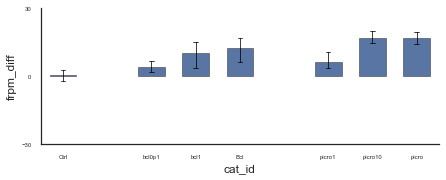

W:\People\Raju\PicroDose_21_12_24\plots\frpm_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots\frpm_diff_barplots_P1.eps


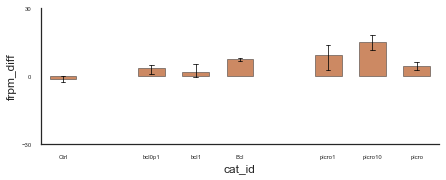

W:\People\Raju\PicroDose_21_12_24\plots\frpm_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots\frpm_diff_barplots_P2.eps


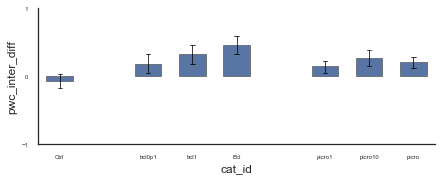

W:\People\Raju\PicroDose_21_12_24\plots\pwc_inter_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots\pwc_inter_diff_barplots_P1.eps


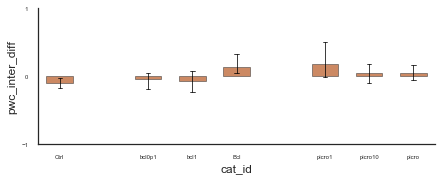

W:\People\Raju\PicroDose_21_12_24\plots\pwc_inter_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots\pwc_inter_diff_barplots_P2.eps


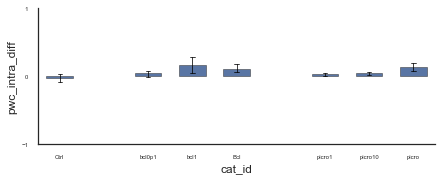

W:\People\Raju\PicroDose_21_12_24\plots\pwc_intra_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots\pwc_intra_diff_barplots_P1.eps


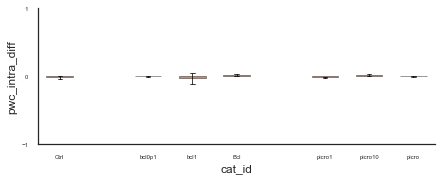

W:\People\Raju\PicroDose_21_12_24\plots\pwc_intra_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots\pwc_intra_diff_barplots_P2.eps


In [159]:
#SuppFigure Plots
fig_dir = r'W:\People\Raju\PicroDose_21_12_24\plots'
save_fig = False
# sns.set_context("paper", rc={"font.size":2,"axes.titlesize":2,"axes.labelsize":2})

### pwc_diff
hue_order = ['Early']
opt = ['Ctrl', '', 'bcl0p1', 'bcl1','Bcl', '', 'picro1', 'picro10', 'picro50']
#opt = ['Ctrl', 'bcl0p1', 'bcl1','Bcl']
# hue_order = ['Early']

sns.set(style="white")
props = ['frpm_diff', 'pwc_inter_diff', 'pwc_intra_diff']

for i in props:
    fig,ax = plt.subplots(figsize=(7.13,2.5))
#     fig,ax = plt.subplots(figsize=(6,3))
    g = sns.barplot(x="cat_id", y=i, data=df_sel_2_1, order=opt, ax=ax, errwidth=.75, errcolor='Black', capsize=.1,
                    dodge=True, linewidth=.5,  edgecolor=".2", ci=95, color='C0')
    g.tick_params(labelsize=6)
    handles, labels = ax.get_legend_handles_labels()
    if('frpm' in i):
        ax.set_ylim(-30,30)
        plt.yticks((-30.,0, 30.))
    elif('fwhm' in i):
        ax.set_ylim(-5,5)
        plt.yticks((-5.,0, 5))
    else:
        ax.set_ylim(-1.,1.)
        plt.yticks((-1.,0, 1.))
        
    change_width(ax, .6)
    sns.despine()

    plt.show()
    post_str = 'barplots_P1'
    if (save_fig):
        fig_fn = os.path.join(fig_dir, i + '_' + post_str + '.png')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
        fig_fn = os.path.join(fig_dir,i + '_' + post_str + '.eps')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            

        
    fig,ax = plt.subplots(figsize=(7.13,2.5))
    g = sns.barplot(x="cat_id", y=i, data=df_sel_2_2, order=opt, ax=ax, errwidth=.75, errcolor='Black', capsize=.1, 
                    dodge=True, linewidth=.5,  edgecolor=".2", ci=95, color='C1')
    g.tick_params(labelsize=6)
    handles, labels = ax.get_legend_handles_labels()
    if('frpm' in i):
        ax.set_ylim(-30,30)
        plt.yticks((-30.,0, 30.))
    elif('fwhm_05' in i):
        ax.set_ylim(-5,5)
        plt.yticks((-5.,0, 5))
    else:
        ax.set_ylim(-1.,1.)
        plt.yticks((-1.,0, 1.))
    change_width(ax, .6)
    sns.despine()

    plt.show()

    post_str = 'barplots_P2'
    if (save_fig):
        fig_fn = os.path.join(fig_dir, i + '_' + post_str + '.png')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
        fig_fn = os.path.join(fig_dir,i + '_' + post_str + '.eps')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            



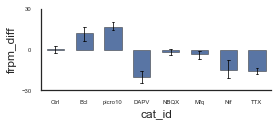

W:\People\Raju\PicroDose_21_12_24\plots_main\frpm_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots_main\frpm_diff_barplots_P1.eps


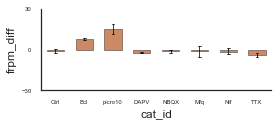

W:\People\Raju\PicroDose_21_12_24\plots_main\frpm_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots_main\frpm_diff_barplots_P2.eps


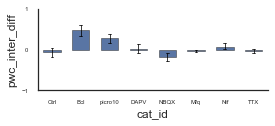

W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_inter_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_inter_diff_barplots_P1.eps


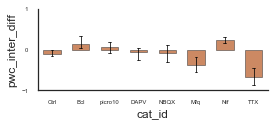

W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_inter_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_inter_diff_barplots_P2.eps


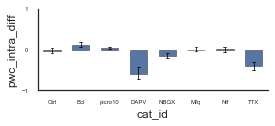

W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_intra_diff_barplots_P1.png
W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_intra_diff_barplots_P1.eps


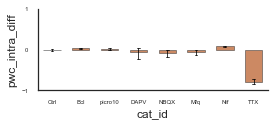

W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_intra_diff_barplots_P2.png
W:\People\Raju\PicroDose_21_12_24\plots_main\pwc_intra_diff_barplots_P2.eps


In [138]:
#Main Figure upgrade

#fig_dir = r'W:\People\Raju\Revision_nBME\DT_Ims\Final_v08_nBME'
fig_dir = r'W:\People\Raju\PicroDose_21_12_24\plots_main'
save_fig = True
# sns.set_context("paper", rc={"font.size":2,"axes.titlesize":2,"axes.labelsize":2})
### pwc_diff
hue_order = ['Early']
opt = ['Ctrl', 'Bcl', 'picro10', 'DAPV', 'NBQX', 'Mfq', 'Nif', 'TTX']

#opt = ['Ctrl', 'bcl0p1', 'bcl1','Bcl']
# hue_order = ['Early']

sns.set(style="white")
# props = ['frpm_diff', 'fwhm_diff', 'pwc_diff_inter', 'pwc_diff_intra', 'rsq_intra', 'rsq_inter', 'GEff_05_diff','GEff_08_diff', 
#          'StabC_intra', 'StabC_inter']
#props = ['frpm_diff_NbyN','frpm_diff', 'GEff_diff', 'pwc_diff', 'pwc_intra_diff', 'pwc_inter_diff', 'fwhm_05_diff', 'rise_tm_diff']
props = ['frpm_diff', 'pwc_inter_diff', 'pwc_intra_diff']

for i in props:
    fig,ax = plt.subplots(figsize=(4.13,1.5))
#     fig,ax = plt.subplots(figsize=(6,3))
    g = sns.barplot(x="cat_id", y=i, data=df_sel_2_1, order=opt, ax=ax, errwidth=.75, errcolor='Black', capsize=.1,
                    dodge=True, linewidth=.5,  edgecolor=".2", ci=95, color='C0')
    g.tick_params(labelsize=6)
    handles, labels = ax.get_legend_handles_labels()
#     g = sns.swarmplot(x="cat_id", y=i, data=df_sel_2_1, color="0.05", ax=ax, order=opt, size=2.)
#     g = sns.barplot(x="cat_id", y=i, data=df_sel_2, order=opt, ax=ax, errwidth=2, errcolor='Gray', 
#                     hue="DIV_cat", dodge=True, linewidth=1,  edgecolor=".2", ci=95, hue_order = hue_order)
#     handles, labels = ax.get_legend_handles_labels()
#     g = sns.swarmplot(x="cat_id", y=i, data=df_sel_2, color="0.05", ax=ax, order=opt, size=3., hue="DIV_cat", 
#                       dodge=True, hue_order = hue_order)
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles[:2], labels[:2])
    if('frpm' in i):
        ax.set_ylim(-30,30)
        plt.yticks((-30.,0, 30.))
    elif('fwhm' in i):
        ax.set_ylim(-5,5)
        plt.yticks((-5.,0, 5))
    else:
        ax.set_ylim(-1.,1.)
        plt.yticks((-1.,0, 1.))
        
#     ax.grid(axis='y')
    change_width(ax, .6)
    sns.despine()

    plt.show()
    post_str = 'barplots_P1'
    if (save_fig):
        fig_fn = os.path.join(fig_dir, i + '_' + post_str + '.png')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
        fig_fn = os.path.join(fig_dir,i + '_' + post_str + '.eps')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            

        
    fig,ax = plt.subplots(figsize=(4.13,1.5))
#     fig,ax = plt.subplots(figsize=(12,6))
    g = sns.barplot(x="cat_id", y=i, data=df_sel_2_2, order=opt, ax=ax, errwidth=.75, errcolor='Black', capsize=.1, 
                    dodge=True, linewidth=.5,  edgecolor=".2", ci=95, color='C1')
#     g = sns.boxplot(x="cat_id", y=i, data=df_sel_2_2, order=opt, ax=ax, 
#                     dodge=True, linewidth=.5, color='C1')
    g.tick_params(labelsize=6)
    handles, labels = ax.get_legend_handles_labels()
#     g = sns.swarmplot(x="cat_id", y=i, data=df_sel_2_2, color="0.05", ax=ax, order=opt, size=2.)
#     ax.legend(handles[:2], labels[:2])
    if('frpm' in i):
        ax.set_ylim(-30,30)
        plt.yticks((-30.,0, 30.))
    elif('fwhm_05' in i):
        ax.set_ylim(-5,5)
        plt.yticks((-5.,0, 5))
    else:
        ax.set_ylim(-1.,1.)
        plt.yticks((-1.,0, 1.))
    change_width(ax, .6)
    sns.despine()

    plt.show()

    post_str = 'barplots_P2'
    if (save_fig):
        fig_fn = os.path.join(fig_dir, i + '_' + post_str + '.png')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
        fig_fn = os.path.join(fig_dir,i + '_' + post_str + '.eps')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            

